## <center> EDA <br>"Analysis of reasons for global differences of being happy" in 162 countries in 2017

#### In this analysis should be examined the correlations between Freedom, Happiness, Religion, Safety, Life-expectancy, Gender-Equality, GDP_per_capita, Population, Peace, Freedom of speech, Corruption and Human development.¶

### The question, which nation has the happiest people, and why, is examined and rated by the Global Happiness-Index.
The scores and rankings utilize information are from the Gallup World Survey. They are based on answers to the most life evaluation address, known as the Cantril-Ladder, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale. The factors used to explain the score are
GDP per capita,
Healthy Life Expectancy,
Social support,
Freedom to make life choices,
Generosity,
Corruption Perception and the 
Residual error.

### The Cantril-Ladder 
![title](img/c.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
from plotly.subplots import make_subplots
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
import os
import plotly.figure_factory as ff

%matplotlib inline

df = pd.read_csv("files/df.csv")
pd.set_option("display.max_columns", None)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df['GdpLog'] = np.log(df["GDP_per_capita"])
df["CorruptSc"] = (df["CorruptSc"] / 10)

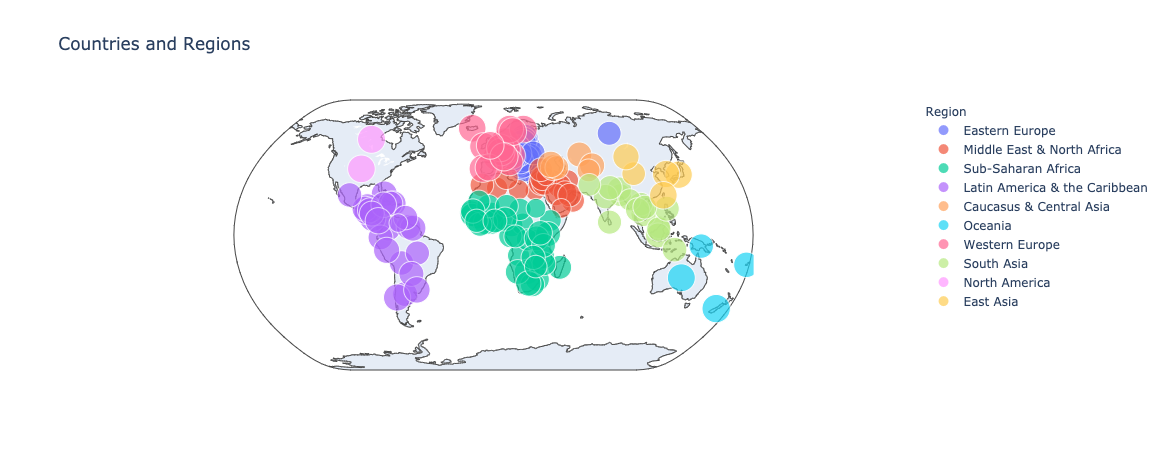

In [2]:
df['FreeSc'] = df['FreeSc'].astype(float)
fig = px.scatter_geo(df, 
                     locations='ISO_code',
                     color='Region',
                     size="FreeSc", hover_name='Country', 
                     projection="natural earth", 
#                    animation_frame="years",
                     title='Countries and Regions')
iplot(fig)
#Öffnet die First figure in neuem Fenster
#fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
#fig.write_html('first_figure.html', auto_open=True)

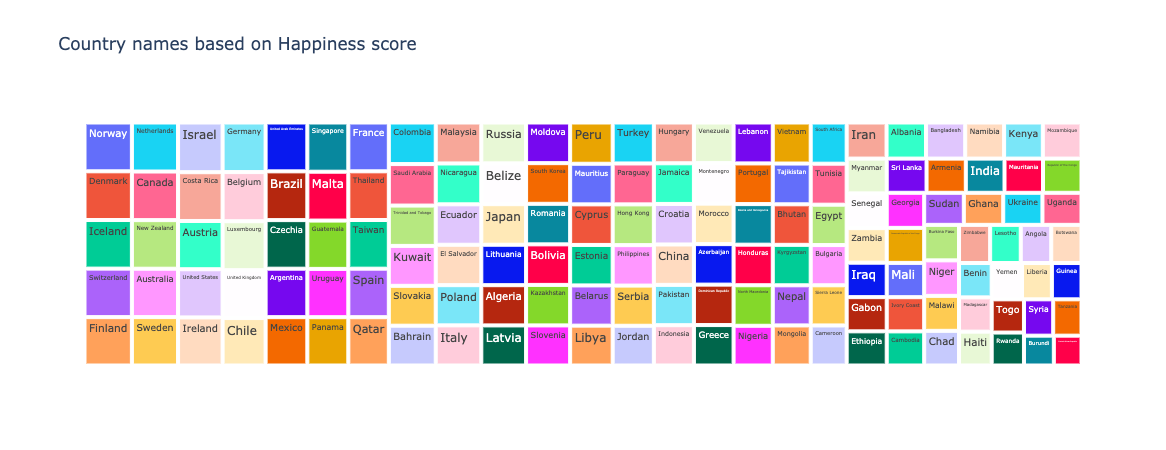

In [3]:
fig = px.treemap(df, path=["Country"], values='HappySc',title="Country names based on Happiness score")
fig.show()

##### Creating a new column to log the gdp-per-capita, scaling the Corrupt-Score and dropping the Unnamed-column

In [4]:
#df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
#df['GdpLog'] = np.log(df["GDP_per_capita"])
#df["CorruptSc"] = (df["CorruptSc"] / 10)
df.head(3)

ISO_code  Country                      Region  FreeSc  FreeRk  FreeQuart  \
0      ALB  Albania              Eastern Europe    7.84    38.0        1.0   
1      DZA  Algeria  Middle East & North Africa    4.99   155.0        4.0   
2      AGO   Angola          Sub-Saharan Africa    5.40   151.0        4.0   

   RoLaw  FemSafe  PersSafe  RelFree  ExpFree  GenderIdty  PersFreeSc  \
0    5.3      8.8       9.3      9.2      8.6         5.8        8.01   
1    3.8      5.0       7.8      4.9      7.3         0.0        5.20   
2    3.4      7.5       8.1      8.8      6.5         5.0        5.98   

   PersFreeRk  EcoFreeSc  EcoFreeRk  HappyRk  HappySc  GDP_per_capita  \
0        46.0       7.67       30.0    109.0    4.644          4850.0   
1       146.0       4.77      159.0     53.0    5.872          4812.0   
2       121.0       4.83      158.0    140.0    3.795          3410.0   

   Population  LifeAge  RelImp  PeaceRk  CorruptSc  CorruptRk  HumDevRk  \
0   2884169.0   78.333    39.0     60.0        3.8       91.0      69.0   
1  41389189.0   76.499    90.0    107.0        3.3      112.0      82.0   
2  29816766.0   60.379    88.0     74.0        1.9      167.0     149.0   

   HumDevSc  Gend_Eq    GdpLog  
0     0.789     7.62  8.486734  
1     0.758     5.58  8.478868  
2     0.576      NaN  8.134468

##### Looking for countries with missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ISO_code        162 non-null    object 
 1   Country         162 non-null    object 
 2   Region          162 non-null    object 
 3   FreeSc          162 non-null    float64
 4   FreeRk          162 non-null    float64
 5   FreeQuart       162 non-null    float64
 6   RoLaw           162 non-null    float64
 7   FemSafe         162 non-null    float64
 8   PersSafe        162 non-null    float64
 9   RelFree         162 non-null    float64
 10  ExpFree         162 non-null    float64
 11  GenderIdty      162 non-null    float64
 12  PersFreeSc      162 non-null    float64
 13  PersFreeRk      162 non-null    float64
 14  EcoFreeSc       162 non-null    float64
 15  EcoFreeRk       162 non-null    float64
 16  HappyRk         147 non-null    float64
 17  HappySc         147 non-null    flo

In [7]:
#null_data = df[df.isnull().any(axis=1)]
#null_data.head(3)
#df_fill = df[["Country", "HumDevSc", 'Gend_Eq']]
#df_fill = df_fill.sort_values(by=["HumDevSc", 'Gend_Eq'], ascending=True) 
#df_fill[(df_fill["HumDevSc"] <= 0.6) & (df_fill['Gend_Eq'] < 0.5)]

#### For the moment I ignore the missing data

In [8]:
df.describe()

FreeSc      FreeRk   FreeQuart       RoLaw     FemSafe    PersSafe  \
count  162.000000  162.000000  162.000000  162.000000  162.000000  162.000000   
mean     6.887963   81.358025    2.487654    5.107407    8.090741    8.161111   
std      1.104117   46.950961    1.121432    1.632038    2.281979    1.455521   
min      3.790000    1.000000    1.000000    1.800000    0.700000    3.600000   
25%      6.212500   41.000000    1.250000    4.000000    7.200000    7.400000   
50%      6.825000   81.500000    2.000000    4.700000    8.800000    8.400000   
75%      7.740000  121.750000    3.000000    6.375000   10.000000    9.300000   
max      8.880000  162.000000    4.000000    8.700000   10.000000   10.000000   

          RelFree     ExpFree  GenderIdty  PersFreeSc  PersFreeRk   EcoFreeSc  \
count  162.000000  162.000000  162.000000  162.000000  162.000000  162.000000   
mean     7.468704    7.749383    6.496914    6.976852   81.500000    6.799074   
std      1.643119    1.515766    3.153908    1.454050   46.909487    0.933742   
min      0.000000    1.900000    0.000000    2.530000    1.000000    2.580000   
25%      6.500000    6.900000    4.350000    5.972500   41.250000    6.202500   
50%      7.950000    8.000000    7.500000    6.950000   81.500000    6.860000   
75%      8.575000    8.900000    9.000000    8.040000  121.750000    7.505000   
max      9.900000    9.800000   10.000000    9.450000  162.000000    8.910000   

        EcoFreeRk     HappyRk     HappySc  GDP_per_capita    Population  \
count  162.000000  147.000000  147.000000      155.000000  1.550000e+02   
mean    81.277778   77.285714    5.371973    14888.935484  4.714239e+07   
std     46.939137   45.257558    1.141652    20118.060917  1.607560e+08   
min      1.000000    1.000000    2.693000      214.000000  9.641800e+04   
25%     40.500000   37.500000    4.505500     1795.500000  4.144813e+06   
50%     81.000000   77.000000    5.293000     5828.000000  1.051310e+07   
75%    121.750000  116.500000    6.256000    17983.000000  3.434122e+07   
max    162.000000  155.000000    7.537000   107316.000000  1.421022e+09   

          LifeAge      RelImp     PeaceRk   CorruptSc   CorruptRk    HumDevRk  \
count  157.000000  140.000000  148.000000  155.000000  155.000000  156.000000   
mean    72.702994   72.250000   78.540541    4.467742   84.993548   89.826923   
std      7.742742   24.421693   46.952194    1.912567   50.736459   56.011769   
min     52.240000    7.000000    1.000000    1.400000    1.000000    1.000000   
25%     67.277000   51.750000   37.750000    3.050000   39.000000   41.750000   
50%     74.340000   81.500000   76.000000    3.900000   85.000000   85.000000   
75%     78.333000   93.000000  120.250000    5.850000  126.000000  139.000000   
max     84.493000   99.000000  161.000000    8.900000  178.000000  189.000000   

         HumDevSc     Gend_Eq      GdpLog  
count  156.000000  145.000000  155.000000  
mean     0.723231    6.593172    8.672523  
std      0.154374    1.951363    1.489452  
min      0.373000    1.590000    5.365976  
25%      0.604500    5.200000    7.492526  
50%      0.754500    6.500000    8.670429  
75%      0.845750    8.340000    9.794780  
max      0.953000    9.610000   11.583533

#### Looking for correlations

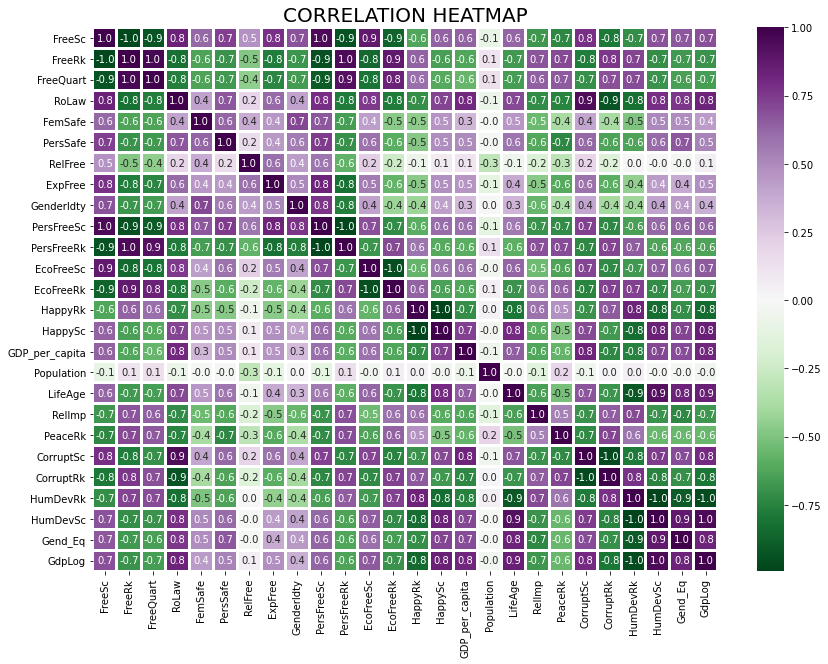

In [9]:
plt.figure(figsize=(14,10))
plt.title("CORRELATION HEATMAP",fontsize=20)
sns.heatmap(data=df.corr(),cmap="PRGn_r",annot=True, fmt='.1f', linewidths=2)
plt.show()

#### There are correlations between nearly every feature except Population and Freedom of Religion.
##### Keep in mind that the Freedom Score is high correlated because its made of some of the features. Same for the Happiness Score.
##### Gdp-per capita, Corruption, Lifeexpectancy and Gender equality have high correlations to most of the other features.
##### The freedom of expression and Gender identity seems not so important as I thought.

##### Heatmap only for some features of interest

In [10]:
# First, we will create a data frame containing only some features of interest
selection = df[['GdpLog', 'CorruptSc', 'Gend_Eq','LifeAge', 'Region',
                     'FreeSc', 'HappySc']]

<AxesSubplot:>

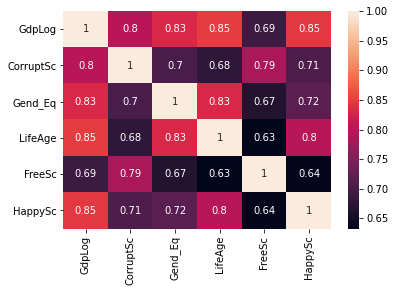

In [11]:
# Next, we create a heat map of the correlation matrix
plt.figure()
sns.heatmap(selection.corr(), annot=True)

#### Is there a significant distribution by region?

In [12]:
plt.figure()
sns.pairplot(selection, hue='Region')

<Figure size 432x288 with 0 Axes>

#### Yes, there a significant distribution by region, like the diagonal line from upper left to lower right shows
##### The upper graphics shows also the clear linearity between the selected features 

##### The Freedom Score is the sum of the Personal Freedom Score and the Economic Freedom Score. Maybe I don't need all these features

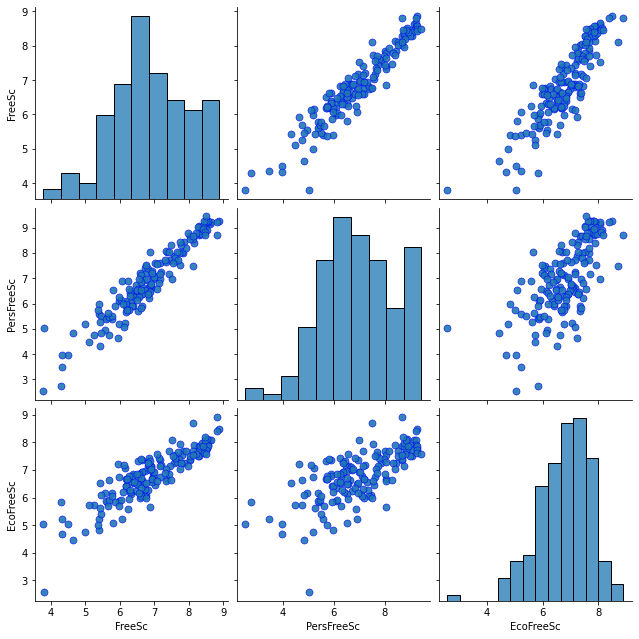

In [13]:
# "LawFree", "PersSafe", "RelFree", "ExpFree", "GenderIdty", "HappySc", "GDP_per_capita", "CorruptSc", "HumDevSc", "Gend_Eq"
sns.pairplot(data = df, 
             vars = ['FreeSc','PersFreeSc', 'EcoFreeSc'], 
              plot_kws = {'alpha': 0.9, 's': 50, 'edgecolor': 'b'},
              height = 3);

##### Since the Personal Freedom Score and the Economic Freedom Score have some dispersal, I keep them all. 

##### Now looking at Safety-Scores and Gender Equality

In [14]:
x = df.FemSafe
y = df.PersSafe
z = df.Gend_Eq
bins = np.linspace(0, 10, 30)
pyplot.figure(figsize = [8, 4])
pyplot.hist(x, bins, alpha=0.4, label='FemSafe')
pyplot.hist(y, bins, alpha=0.4, label='PersSafe')
pyplot.hist(z, bins, alpha=0.4, label="Gend_Eq")
pyplot.legend(loc='upper left')
plt.xlabel("Score") 
plt.ylabel("Count")
pyplot.show()

##### The feature of Female Safety is not very diffizile, but I keep it it.

##### There is a (spreaded) correlation between Gender-Equality and Personal safety

In [15]:
x = df.PersSafe
y = df.Gend_Eq
pyplot.figure(figsize = [8, 4])
pyplot.scatter(x,y, alpha=0.4, color='blue')
plt.xlabel("Personal Safety") 
plt.ylabel("Gender Equality")
pyplot.show()

##### Big linearity between Gender Equality und Life-Expectancy!?!

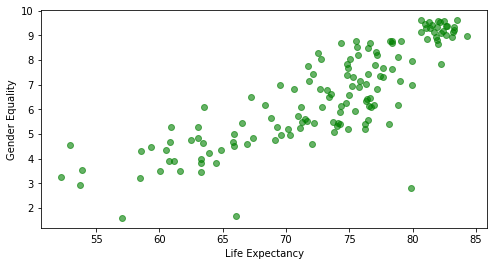

In [16]:
x = df.LifeAge
y = df.Gend_Eq
# bins = np.linspace(0, 10, 30)
pyplot.figure(figsize = [8, 4])
pyplot.scatter(x,y, alpha=0.6, color='green')
plt.xlabel("Life Expectancy") 
plt.ylabel("Gender Equality")
pyplot.show()

##### And also between Gender Equality und Happiness

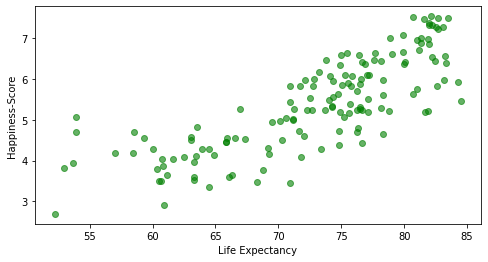

In [17]:
x = df.LifeAge
y = df.HappySc
# bins = np.linspace(0, 10, 30)
pyplot.figure(figsize = [8, 4])
pyplot.scatter(x,y, alpha=0.6, color='green')
plt.xlabel("Life Expectancy") 
plt.ylabel("Happiness-Score")
pyplot.show()

#### Depends Happiness on peace?

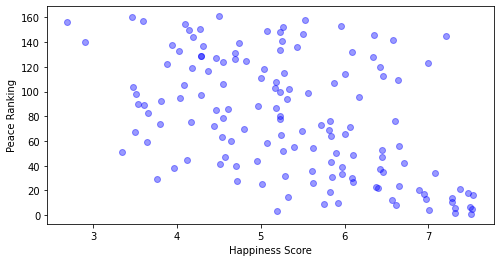

In [18]:
x = df.HappySc
y = df.PeaceRk
# bins = np.linspace(0, 10, 30)
pyplot.figure(figsize = [8, 4])
pyplot.scatter(x,y, alpha=0.4, color='blue')
plt.xlabel("Happiness Score") 
plt.ylabel("Peace Ranking")
pyplot.show()

#### Not as much as one could think

##### The correlation between Happiness and Life Expectancy

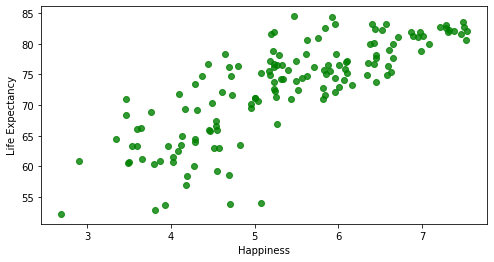

In [19]:
x = df.HappySc
y = df.LifeAge
bins = np.linspace(0, 5, 10)
pyplot.figure(figsize = [8, 4])
pyplot.scatter(x,y, alpha=0.8, color='green')
plt.xlabel("Happiness") 
plt.ylabel("Life Expectancy")
pyplot.show()

##### Correlation between Happiness and Personal Importance of Religion

In [20]:
x = df.HappySc
y = df.RelImp
bins = np.linspace(0, 5, 10)
pyplot.figure(figsize = [8, 4])
pyplot.scatter(x,y, alpha=0.8, color='green')
plt.xlabel("Happiness") 
plt.ylabel("Personal Importance of Religion (%)")
pyplot.show()

##### The correlation between Corruption and Freedom of Economy

In [21]:
x = df.CorruptSc
y = df.EcoFreeSc
bins = np.linspace(0, 5, 10)
pyplot.figure(figsize = [8, 4])
pyplot.scatter(x,y, alpha=0.8, color='green')
plt.xlabel("Corruption") 
plt.ylabel("Freedom of Economy")
pyplot.show()

#### How is the Happiness Score correlated to the Freedom-Score?

In [22]:
trace1 = go.Box(
                y = df.FreeSc,
                name = 'Freedom Score',
                marker = dict(color= 'rgb(78, 54, 23)')
                )
trace2 = go.Box(
                y = df.HappySc,
                name = 'Happiness Score',
                marker = dict(color = 'rgb(20, 24, 79)')
                )
#trace3 = go.Box(
#                y = df.CorruptSc,
#                name = 'GdpLog',
#                marker = dict(color = 'rgb(20, 24, 79)')
#                )
efdata = [trace1, trace2] #, trace3]
py.iplot(efdata)

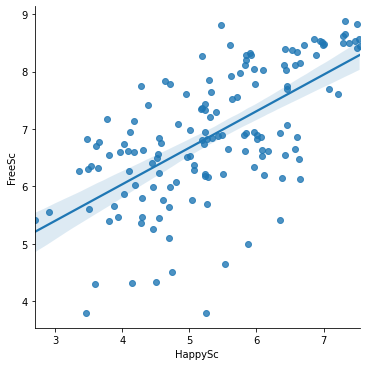

In [23]:
sns.lmplot(data=df,x="HappySc",y="FreeSc")

#### There is a poor linearity between Happiness- and Freedom-Score with big variance and many outliers. Same with the Rankings of both features.

### How is the Happiness-Score correlated with the (logged) GDP-per-capita? 
#### Below you see: Economic seems to be more important for Happiness than Freedom or Peace

In [24]:
x = df.HappySc
y = df.GdpLog
# bins = np.linspace(0, 10, 30)
pyplot.figure(figsize = [8, 4])
pyplot.scatter(x,y, alpha=0.6, color='green')
plt.xlabel("Happiness Score") 
plt.ylabel("Logged GDP")
pyplot.show()

##### The comparison of the GdP-per-captia and the Happy-Score shows complete different distribution for this two strong correlating features. The Logged GDP explains that.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

<ipython-input-25-f4616cf70687>:5: Us

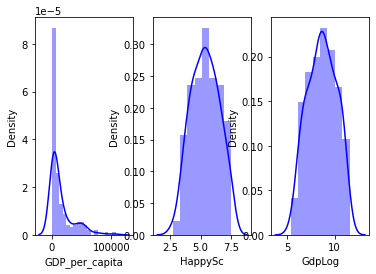

In [25]:
fig, ax =plt.subplots(1,3)
sns.distplot(df['GDP_per_capita'], color = 'blue', ax=ax[0])
sns.distplot(df['HappySc'], color = 'blue', ax=ax[1])
sns.distplot(df['GdpLog'], color = 'blue', ax=ax[2])
fig.show()

# sns.distplot(df['GDP_per_capita'], color = 'blue');

#### The GDP-per-capita (not logged) boxplot is very interesting.

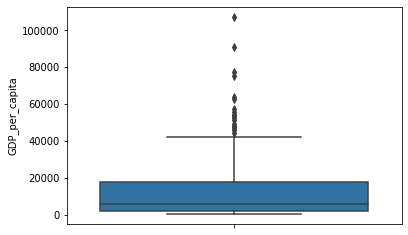

In [26]:
sns.boxplot( y=df["GDP_per_capita"] );
plt.show()

In [27]:
a = df.GDP_per_capita.mean()
b = df.GDP_per_capita.median()
c = df.GDP_per_capita.min()
d = df.GDP_per_capita.max()
print("GDP_per_capita:" )
print("mean = " + str(a))
print("median = " + str(b))
print("min = " + str(c))
print("max = " + str(d))

GDP_per_capita:
mean = 14888.935483870968
median = 5828.0
min = 214.0
max = 107316.0


In [28]:
gd = df.query('GDP_per_capita <= 14889')
gm = df.query('GDP_per_capita >= 14889')
print(str(len(gm)) + " countries are above the GDP-Mean and " + str(len(gd)) + " are below")

47 countries are above the GDP-Mean and 108 are below


#### Only 30 % of the countries are above the GDP-per-capita mean. The mean and the median are far away.

#### The HappyScore boxplot

In [29]:
sns.boxplot( y=df["HappySc"] );
plt.show()

In [30]:
a = df.HappySc.mean()
b = df.HappySc.median()
c = df.HappySc.min()
d = df.HappySc.max()
print("HappySc:" )
print("mean = " + str(a))
print("median = " + str(b))
print("min = " + str(c))
print("max = " + str(d))

HappySc:
mean = 5.371972789569777
median = 5.2930002212524405
min = 2.69300007820129
max = 7.537000179290769


In [31]:
haphigh = df.query('HappySc >= 6')
hapmid = df.query(('HappySc < 6  and HappySc >= 3'))
haplow = df.query(('HappySc < 3'))
df_hh = haphigh
print(str(len(haplow)) + " countries in suffering area")
print(str(len(hapmid)) + " countries in struggling area")
print(str(len(haphigh)) + " countries in thriving area")
print("World Population in (happy) thriving area is only " + str((df_hh.Population.sum() / df.Population.sum()) * 100) + " percent")

2 countries in suffering area
100 countries in struggling area
45 countries in thriving area
World Population in (happy) thriving area is only 19.375155216518934 percent


#### Only 30 % of the countries are in the "happy"-area of the Cantril-Ladder. That's less than 20 % of the global population. Sad! 

#### The next plots for every region shows, that the GDP-per-capita-importance for the Happiness-score seems to be is extremely wheighted

In [32]:
sns.lmplot(x="GdpLog", y="HappySc", col="Region", data=df, col_wrap=6)

## Looking for the significance of the single region
##### Countries in region

In [33]:
p = sns.countplot(data=df, x="Region")
_ = plt.setp(p.get_xticklabels(), rotation=90)

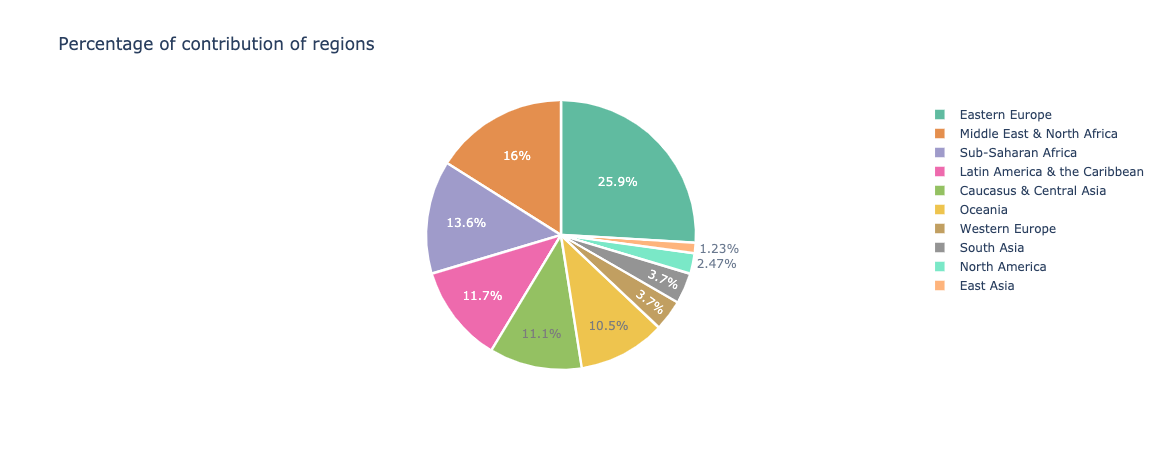

In [34]:
fig = px.pie(values = df["Region"].value_counts(),
             names= df['Region'].unique(),
             title="Percentage of contribution of regions",
             color_discrete_sequence=px.colors.qualitative.Dark2,
             )

fig.update_traces(marker_line_color='rgb(255,255,255)', 
                  marker_line_width=2.5, 
                  opacity=0.7)
fig.update_layout(width=800)
fig.show()

#### Happiness-Score for regions

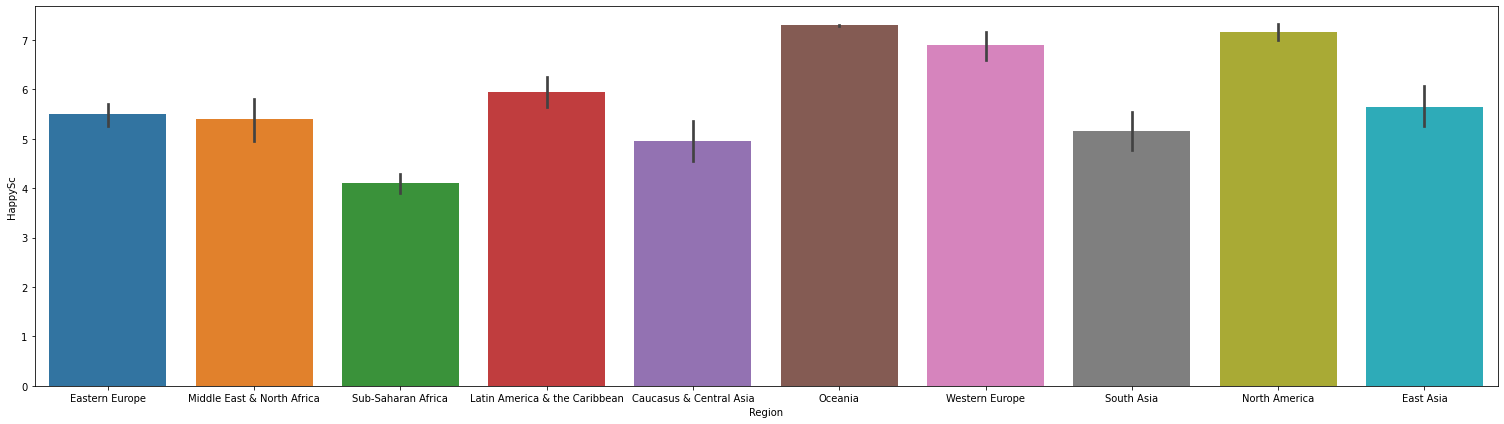

In [35]:
plt.figure(figsize=(21,6))
sns.barplot(x=df['Region'],y='HappySc',data=df)
plt.tight_layout()

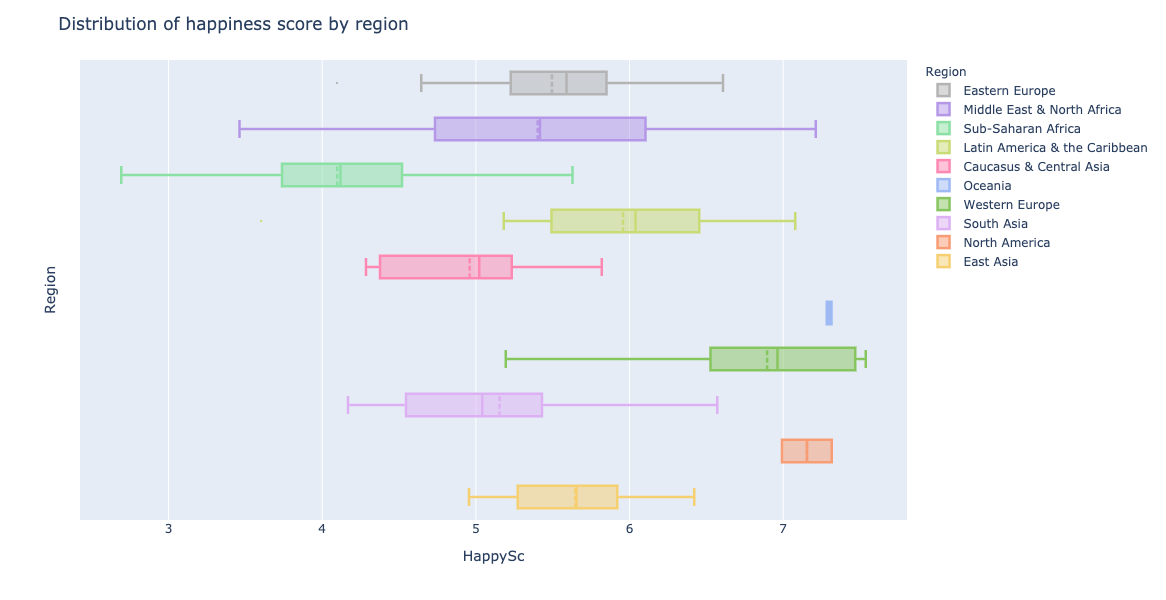

In [36]:
fig = px.box(df,
             x="HappySc",
             y="Region",
             color="Region",
             color_discrete_sequence=px.colors.qualitative.Pastel_r,)
           # template="plotly_dark"
fig.update_traces(boxmean=True,
                  whiskerwidth=0.8,
                  marker_size=2,
                  line_width=2.5
                 
                  )
fig.update_layout(height=600,
                  width=800,
                  showlegend=True,
                  yaxis= dict(showticklabels = False),
                  title="Distribution of happiness score by region")
fig.show()

### The Happiness-Score map

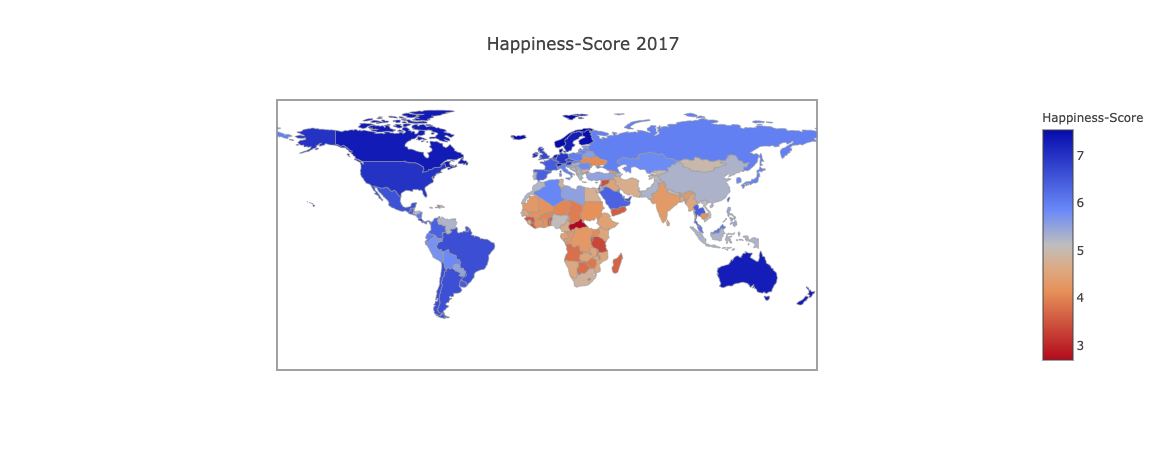

In [37]:
ssw = [dict(
    type = 'choropleth',
    locations = df['Country'],
    locationmode = 'country names',
    z = df['HappySc'],
    text = df['Country'],
    colorscale = [[0,"rgb(5, 10, 172)"],[2,"rgb(40, 60, 190)"],[4,"rgb(70, 100, 245)"],\
            [6,"rgb(90, 120, 245)"],[8,"rgb(106, 137, 247)"],[10,"rgb(220, 220, 220)"]],
    autocolorscale = False,
    reversescale = True,
    marker = dict(line = dict(color = 'rgb(150,150,150)',width = 0.5 )),
    colorbar = dict(autotick=False, tickprefix= '', title='Happiness-Score'),
)]

layout = dict(
    title = 'Happiness-Score 2017',
    geo = dict(showframe=True, showcoastlines=False, projection=dict(type='Mercator'))
)

fig = dict(data=ssw, layout=layout)
py.iplot( fig, validate=False, filename='Happiness-Score')

#### By comparing it with a democracy map it's very similar distributed

### World democracy map
![title](img/democracy.png)

### The Middle East and North Africa region has an interesting distribution of Happiness. It is not the region, religion, political system, Gender Equality or peace, it is just the money that decides Happiness. 

In [38]:
# Filtering data to observe Middle Eastern and North Africaan Countries in the most recent year (2017) :
filter01 = df.Region == 'Middle East & North Africa'
data01 = df[filter01]

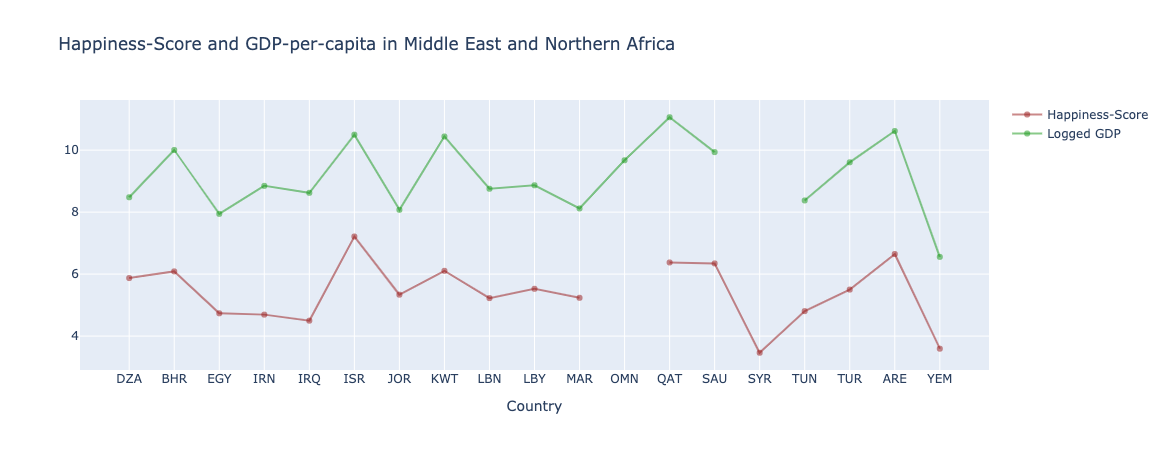

In [39]:
# First trace will be security of women in 2016: 
trace01 = go.Scatter(
                     x = data01['ISO_code'],
                     y = data01['HappySc'],
                     mode = 'lines+markers',
                     name = 'Happiness-Score',
                     marker = dict(color = 'rgba(150, 20, 20, 0.5)'),
                     text= data01['Country'])
# Second trace will show us freedom of women movement in 2016:
trace02 = go.Scatter(
                     x = data01['ISO_code'],
                     y = data01['GdpLog'],
                     mode = 'lines+markers',
                     name = 'Logged GDP',
                     marker = dict(color = 'rgba(20, 150, 20, 0.5)'),
                     text= data01['Country'])
datanew = [trace01, trace02]
layoutnew = dict(title = 'Happiness-Score and GDP-per-capita in Middle East and Northern Africa',
                 xaxis = dict(title = 'Country', ticklen = 3, zeroline = False))
fig = dict(data=datanew, layout=layoutnew)
py.iplot(fig)

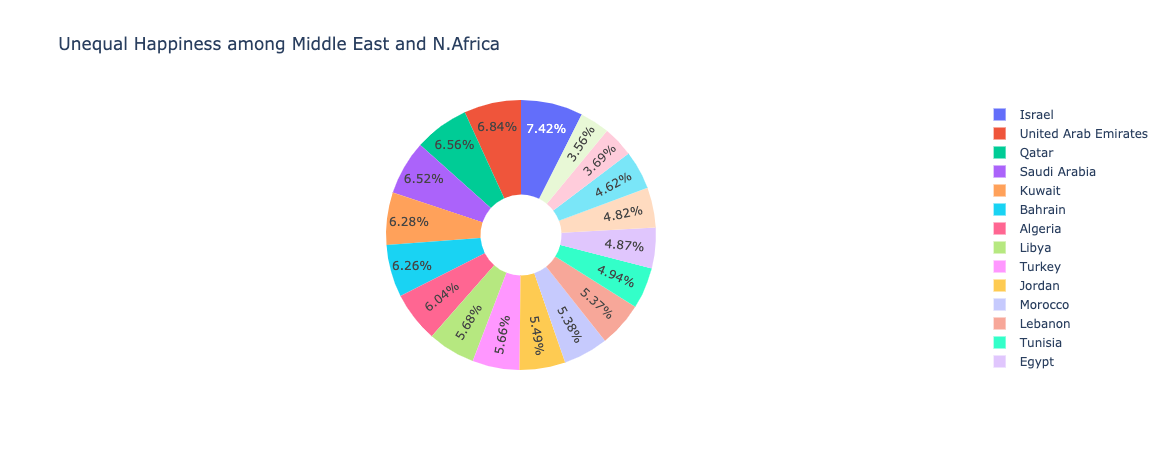

In [40]:
# Analysing Happiness among Middle East and North African Countries:

fig={
                 'data': [ 
                      {
                        'values' : data01['HappySc'],
                        'labels' : data01['Country'],
                        'domain' : {'x': [0, 1]},
                        'name' : 'Happiness',
                        'hoverinfo' : 'label+percent+name',
                        'hole' : 0.3,
                        'type' : 'pie'
                  },
                 ],
               'layout' : {
                             'title' : 'Unequal Happiness among Middle East and N.Africa',
                             'annotations' : [
                                                { 'font' : {'size' : 20},
                                                  'showarrow' : False,
                                                  'text' : ' ',
                                                  'x' : 0.20,
                                                  'y' : 1
                                                 },
                                              ]    
                             }
                }
py.iplot(fig)

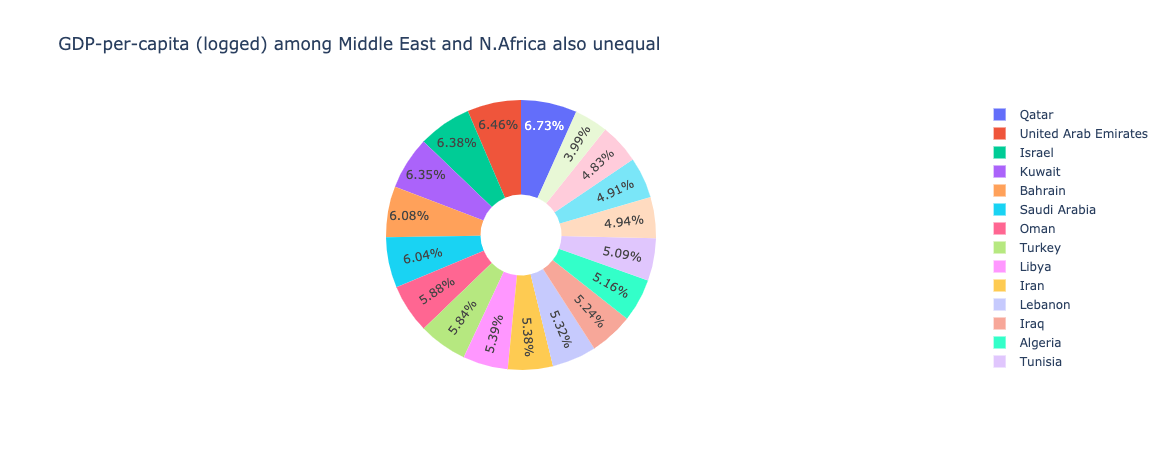

In [41]:
fig = {
        'data': [ 
             {
                'values' : data01['GdpLog'],
                'labels' : data01['Country'],
                'domain' : {'x': [0, 1]},
                'name' : 'Happiness',
                'hoverinfo' : 'label+percent+name',
                'hole' : 0.3,
                'type' : 'pie'
              },
             ],
         'layout' : {
                     'title' : 'GDP-per-capita (logged) among Middle East and N.Africa also unequal',
                     'annotations' : [
                                        { 'font' : {'size' : 20},
                                          'showarrow' : False,
                                          'text' : ' ',
                                          'x' : 0.20,
                                          'y' : 1
                                         },
                                      ]    
                     }
        }
py.iplot(fig)

## First six countries are the same!

#### A look on Gender Equaliy in this region is a bit confusing
The GII (Gender Inequality Index) sheds new light on the position of women in 162 countries; it yields insights in gender gaps in major areas of human development.

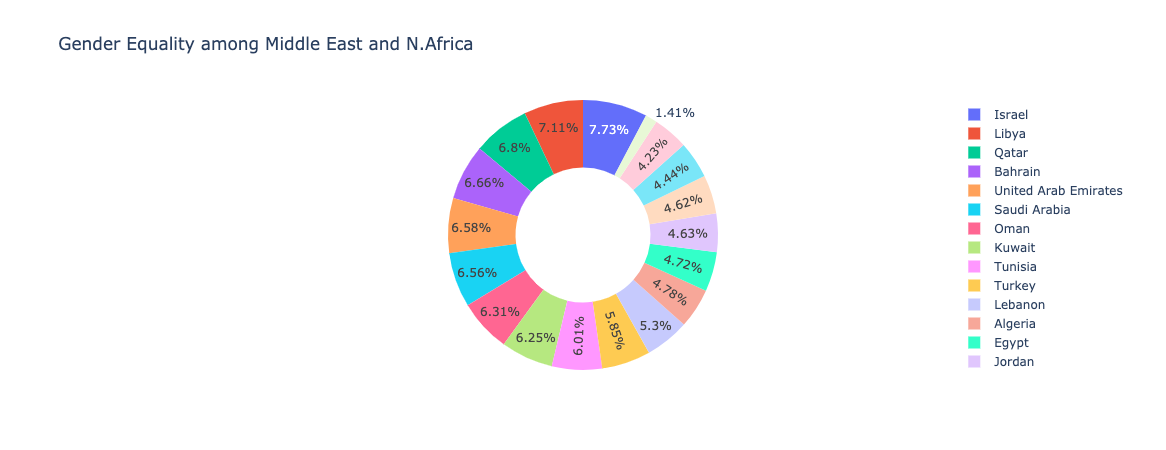

In [42]:


fig={
                 'data': [ 
                      {
                        'values' : data01['Gend_Eq'],
                        'labels' : data01['Country'],
                        'domain' : {'x': [0, 1]},
                        'name' : 'Gender Equality',
                        'hoverinfo' : 'label+percent+name',
                        'hole' : 0.5,
                        'type' : 'pie'
                  },
                 ],
               'layout' : {
                             'title' : 'Gender Equality among Middle East and N.Africa',
                             'annotations' : [
                                                { 'font' : {'size' : 20},
                                                  'showarrow' : False,
                                                  'text' : ' ',
                                                  'x' : 0.20,
                                                  'y' : 1
                                                 },
                                              ]    
                             }
                }
py.iplot(fig)

### Really? 
#### Countries like United Arab Emirates(Rank 49) and Saudi Arabia(Rank 50) have a better Gender Equality than Turkey, Hungary or Russia - and they are just a few places behind the United States (Rank 41)? Is there place for doubt?

#### Amnesty International on WOMEN'S RIGHTS in 2017/2018 for United Arab Emirates and Saudi Arabia:
##### United Arab Emirates: Women remained subject to discrimination in law and in practice, notably in matters of marriage and divorce, inheritance and child custody. They were inadequately protected against sexual violence and violence within the family.

##### Saudi Arabia: Women and girls continued to face discrimination in law and practice, despite the government's promised reforms. Women were required to have permission from a male guardian – their father, husband, brother or son – to enrol in higher education, seek employment, travel or marry. They also remained inadequately protected against sexual and other forms of violence.

##### The GII-Index doesn't mirror in real life.

### What is important to the people for being happy. Let's have a look on a survey in 28 countries (by Ipsos, 2019)

#### Ipsos Happiness survey 2019 - What is important?
![title](img/Ipsos03.png)

#### Financial dependencies are 20 % of the features (Places 2., 8., 10., 12., 17. and 18.) 
### How are the countries ranked?

#### Ipsos Happiness survey 2019
![title](img/Ipsos04.png)

#### In the Happiness-Index Spain is on Rank 34 and China on 79. 
#### In this survey Spain is far behind China.

### How a single feature is correlated to Happiness is extremely dependent of the countries situation. See to whom Safety is important?

#### Ipsos Happiness survey - Personal safety and Security Importance
![title](img/IpsosSaf.png)

#### No surprise, countries with high criminal rates.

### Another interesting detail is the wish after a new political leadership.

#### Ipsos Happiness survey - Importance of a new political leadership
![title](img/Ipsospol.png)

#### The list is full of democracies with right-wing populist governments, including the USA. These leaders are elected, but doesn't make happy.

#### Based on this survey the importance of my dataset-features is in the first place Life-Expectancy. This is not only a number, it's more like a score.
Life expectancy reflects local conditions. The life expectancy depends on many things like gender, education, health system, (mental) well being, food, the possibility for medical treatment and so on. It seems that i. e. in the United States the life expectancy decreases  especially by people with low income and education. These groups are often overweighted, they smoke, drink and/or take drugs, having precarious living conditions and couldn't often pay necessary life extending treatments.

#### Beside health (life expectancy) and different financial states also personal safety and security, freedom of speech and ecomic freedom seems to be very important. These are very similar features like in the original Happiness-Index. So I take this features from my dataset to create a new dataset and see how it correlates to the Happiness-Index.

# Notebook ends here !!!
## Everything down is just for testing and throws out after finishing this notebook

Text(0, 0.5, 'Count')

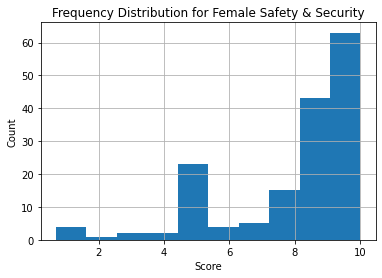

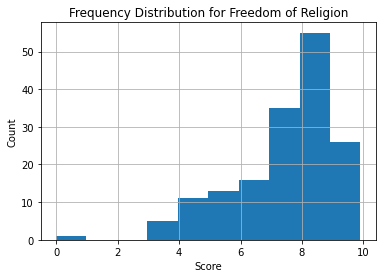

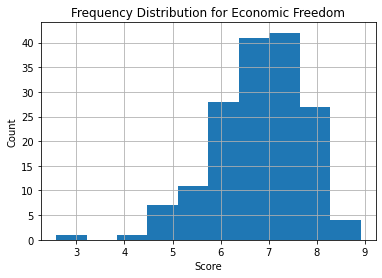

In [43]:
df.hist(column = 'FemSafe')
plt.title('Frequency Distribution for Female Safety & Security')
plt.xlabel("Score") 
plt.ylabel("Count")

df.hist(column = 'RelFree')
plt.title('Frequency Distribution for Freedom of Religion')
plt.xlabel("Score") 
plt.ylabel("Count")

df.hist(column = 'EcoFreeSc')
plt.title('Frequency Distribution for Economic Freedom')
plt.xlabel("Score") 
plt.ylabel("Count")

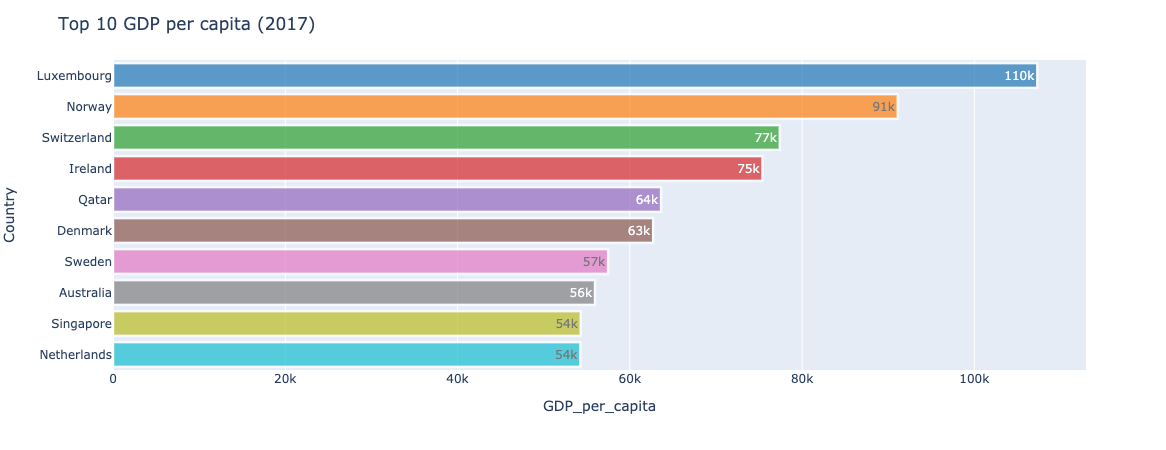

In [44]:
fig_1 = px.bar(data_frame = df.nlargest(10,"GDP_per_capita"),
             y="Country",
             x="GDP_per_capita",
             orientation='h',
             color="Country",
             text="GDP_per_capita",
             color_discrete_sequence=px.colors.qualitative.D3)

fig_1.update_traces(texttemplate='%{text:.2s}', 
                  textposition='inside', 
                  marker_line_color='rgb(255,255,255)', 
                  marker_line_width=2.5, 
                  opacity=0.7)
fig_1.update_layout(width=800,
                  showlegend=False,
                  title="Top 10 GDP per capita (2017)",
)
fig_1.show()

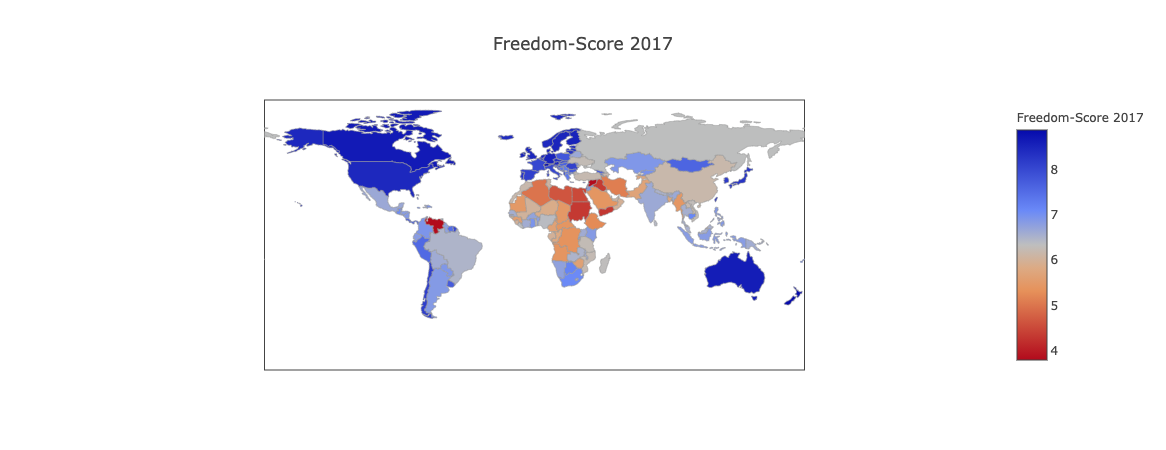

In [45]:
ssw = [dict(
    type = 'choropleth',
    locations = df['Country'],
    locationmode = 'country names',
    z = df["FreeSc"],
    text = df['Country'],
    colorscale = [[0,"rgb(5, 10, 172)"],[2,"rgb(40, 60, 190)"],[4,"rgb(70, 100, 245)"],\
            [6,"rgb(90, 120, 245)"],[8,"rgb(106, 137, 247)"],[10,"rgb(220, 220, 220)"]],
    autocolorscale = False,
    reversescale = True,
    marker = dict(line = dict(color = 'rgb(150,150,150)',width = 0.5 )),
    colorbar = dict(autotick=False, tickprefix= '', title='Freedom-Score 2017'),
)]

layout = dict(
    title = 'Freedom-Score 2017',
    geo = dict(showframe=True, showcoastlines=False, projection=dict(type='Mercator'))
)

fig = dict(data=ssw, layout=layout)
py.iplot( fig, validate=False, filename='Freedom-Score 2017')

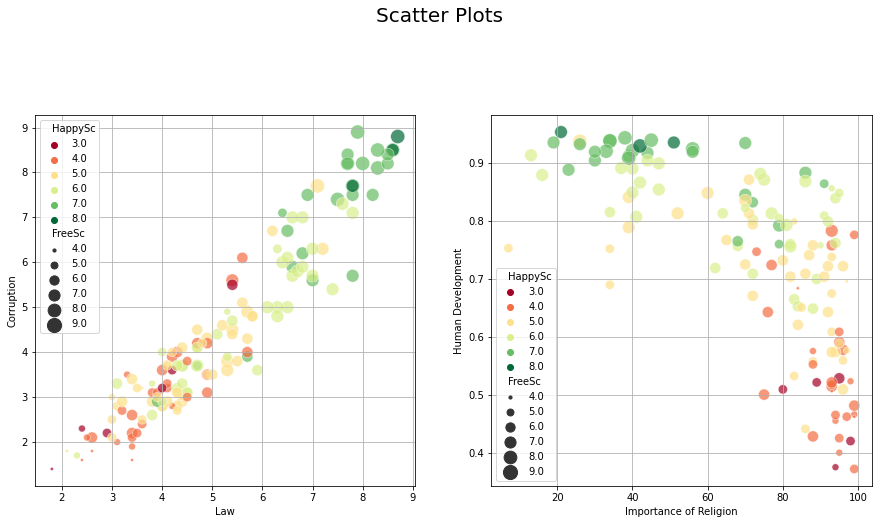

In [46]:
freedom_class = df.HappySc.round(decimals=0)
economy_class = df.FreeSc.round(decimals=0)

plt.figure(figsize=(15,15))

plt.suptitle("Scatter Plots",fontsize=20)

plt.subplot(2,2,1)
sns.scatterplot(data=df,x="RoLaw",y="CorruptSc",hue=freedom_class, palette="RdYlGn",alpha=0.7,size=economy_class, sizes=(10,200))
plt.xlabel("Law")
plt.ylabel("Corruption")
plt.grid()

plt.subplot(2,2,2)
sns.scatterplot(data=df,x="RelImp",y="HumDevSc",hue=freedom_class, palette="RdYlGn",alpha=0.7,size=economy_class, sizes=(10,200))
plt.xlabel("Importance of Religion")
plt.ylabel("Human Development")
plt.grid()

#plt.subplot(2,2,3)
#sns.scatterplot(data=SimplerDataSet,x="pf_security_safety",y="pf_expression",hue=freedom_class, palette="RdYlGn",alpha=0.7,size=economy_class, sizes=(10,200))
#plt.xlabel("Security and Safety")
#plt.ylabel("Expression and Information")
#plt.grid()

#plt.subplot(2,2,4)
#sns.scatterplot(data=SimplerDataSet,x="pf_association",y="ef_regulation",hue=freedom_class, palette="RdYlGn",alpha=0.7,size=economy_class, sizes=(10,200))
#plt.xlabel("Association, Assembly, and Civil Society")
#plt.ylabel("Regulation of Credit, Labor, and Business")
#plt.grid()

#plt.show()

In [47]:
Best_3_free = df[df["FreeRk"] <= 5]
Best_3_eco = df[df["HappyRk"] <= 5]

Worst_3_free = df[df["FreeRk"] >= 158]
Worst_3_eco = df[df["HappyRk"] >= 151]

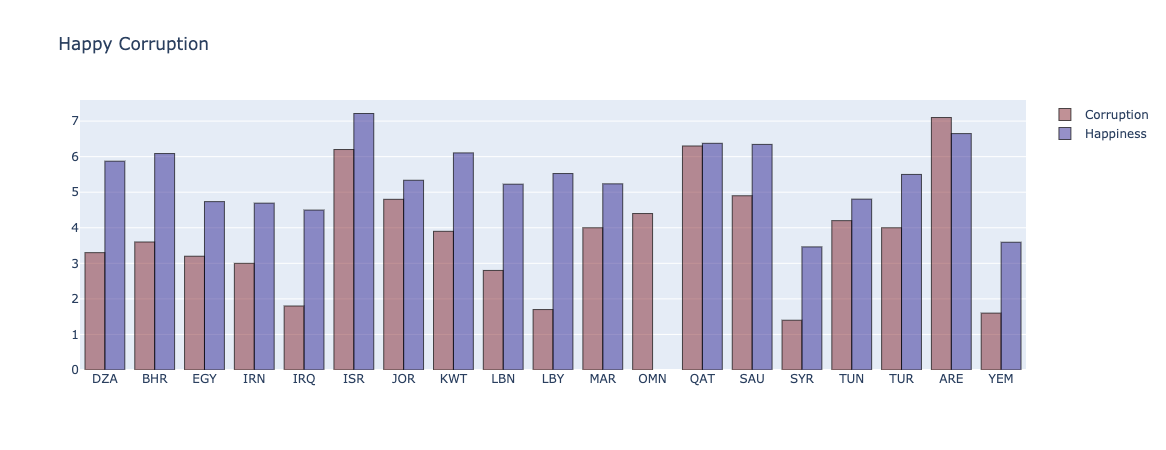

In [48]:
trace01 = go.Bar(
                 x = data01['ISO_code'],
                 y = data01['CorruptSc'],
                 name = 'Corruption',
                 marker = dict(color='rgba(130, 35, 45, 0.5)',
                              line = dict(color='rgba(0,0,0)', width=0.5)),
                 text = data01.Country)
# Security Level of the Country:
trace02 = go.Bar(
                 x = data01['ISO_code'],
                 y = data01['HappySc'],
                 name = 'Happiness',
                 marker = dict(color='rgba(45, 35, 145, 0.5)',
                              line = dict(color='rgba(0,0,0)', width=0.5)),
                 text = data01.Country)
datanew = [trace01, trace02]
layoutnew = go.Layout(barmode='group', title='Happy Corruption')
fig = go.Figure(data=datanew, layout=layoutnew)
py.iplot(fig)

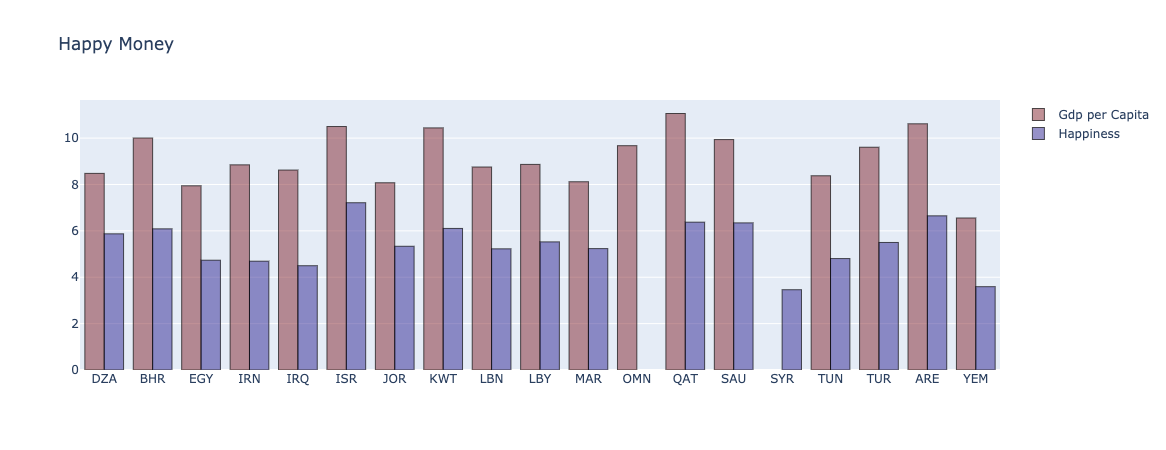

In [49]:
trace01 = go.Bar(
                 x = data01['ISO_code'],
                 y = data01['GdpLog'],
                 name = 'Gdp per Capita',
                 marker = dict(color='rgba(130, 35, 45, 0.5)',
                              line = dict(color='rgba(0,0,0)', width=0.5)),
                 text = data01.Country)
# Security Level of the Country:
trace02 = go.Bar(
                 x = data01['ISO_code'],
                 y = data01['HappySc'],
                 name = 'Happiness',
                 marker = dict(color='rgba(45, 35, 145, 0.5)',
                              line = dict(color='rgba(0,0,0)', width=0.5)),
                 text = data01.Country)
datanew = [trace01, trace02]
layoutnew = go.Layout(barmode='group', title='Happy Money')
fig = go.Figure(data=datanew, layout=layoutnew)
py.iplot(fig)

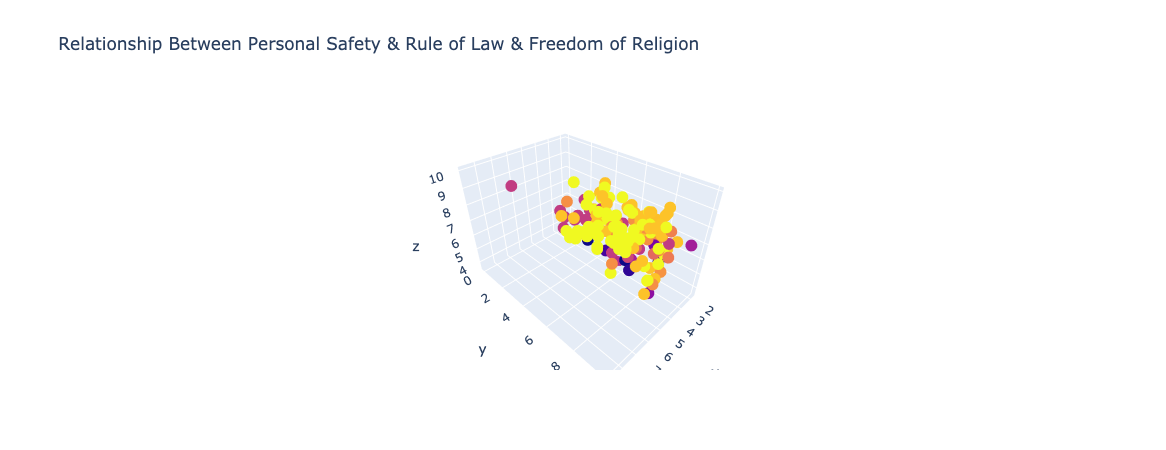

In [50]:
colorEU = [float(each) for each in df['FemSafe']]

trace3D = go.Scatter3d(
    x = df['RoLaw'],
    y = df['RelFree'],
    z = df['PersSafe'],
    mode = 'markers',
    marker = dict(
        size = 7,
        color=colorEU
    )
)

data06 = [trace3D]
layout06 = go.Layout(
    title = 'Relationship Between Personal Safety & Rule of Law & Freedom of Religion',
)
fig = go.Figure(data=data06, layout=layout06)
py.iplot(fig)

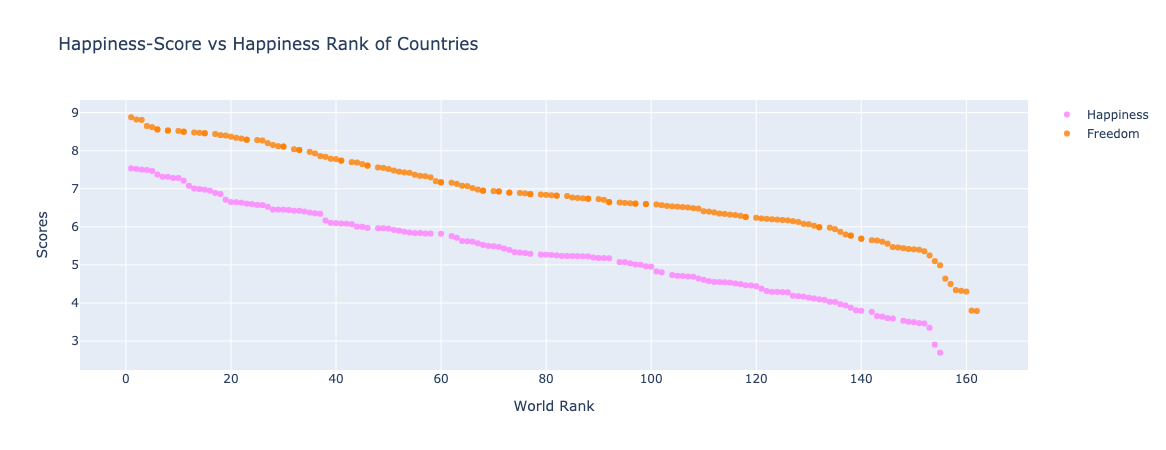

In [51]:
trace1 =go.Scatter(
                    x = df.HappyRk,
                    y = df.HappySc,
                    mode = "markers",
                    name = "Happiness",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df.Country)

trace2 =go.Scatter(
                    x = df.FreeRk,
                    y = df.FreeSc,
                    mode = "markers",
                    name = "Freedom",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df.Country)

data = [trace1, trace2]
layout = dict(title = 'Happiness-Score vs Happiness Rank of Countries ',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Scores',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

## Oben und unten kann mit weiteren traces erweitert werden
trace2 =go.Scatter(
                    x = df2015.hf_rank,
                    y = df2015.hf_score,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.countries)
creating trace3
trace3 =go.Scatter(
                    x = df2016.hf_rank,
                    y = df2016.hf_score,
                    mode = "lines",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.countries)
data = [trace1, trace2, trace3]

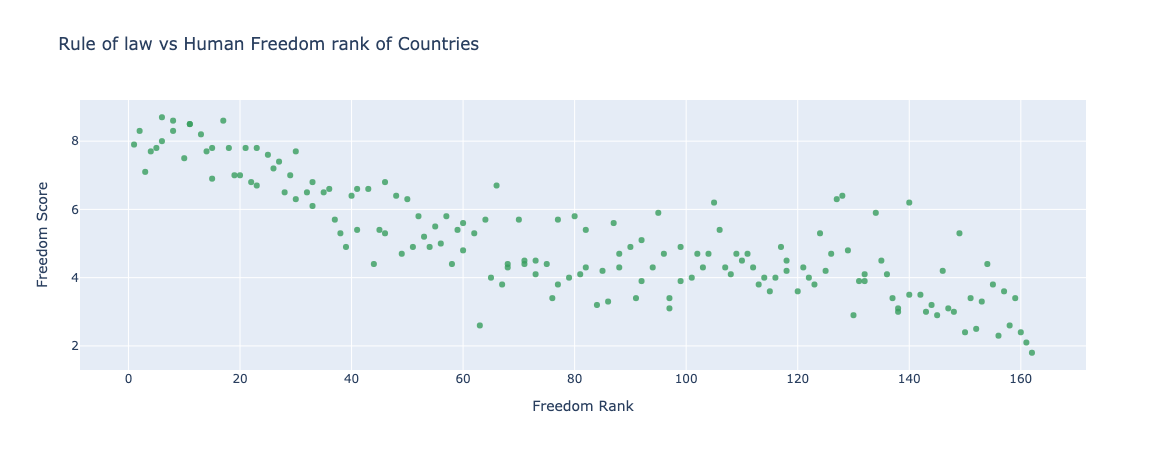

In [52]:
trace1 =go.Scatter(
                    x = df.FreeRk,
                    y = df.RoLaw,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(55, 157, 94, 0.8)'),
                    text= df.Country)

data = [trace1]
layout = dict(title = 'Rule of law vs Human Freedom rank of Countries ',
              xaxis= dict(title= 'Freedom Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Freedom Score',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

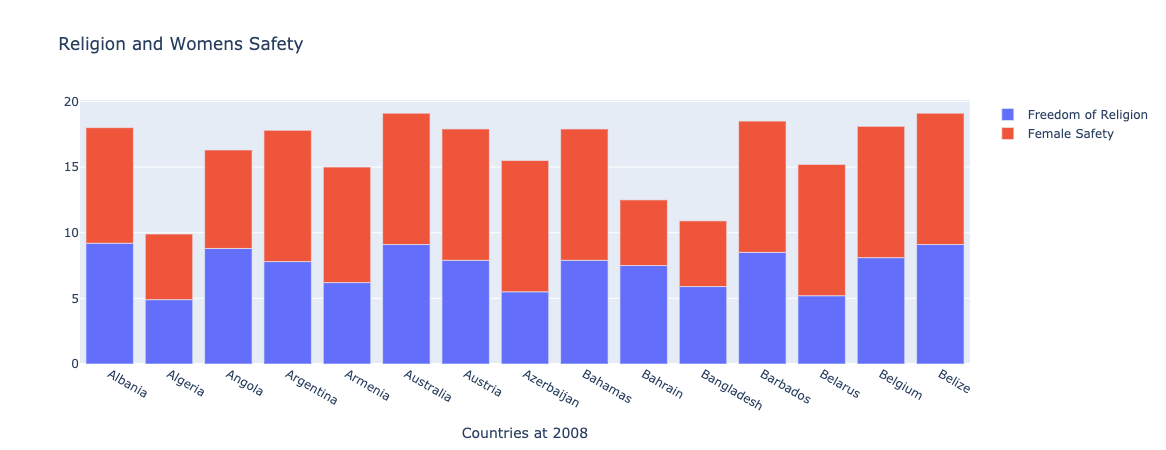

In [53]:
df2008 = df.iloc[:15,:]
x = df.Country

trace1 = {
  'x': x,
  'y': df2008.RelFree,
  'name': 'Freedom of Religion',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df2008.FemSafe,
  'name': 'Female Safety',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': ' Countries at 2008'},
  'barmode': 'relative',
  'title': 'Religion and Womens Safety'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [54]:
freedomscore=df["FreeSc"].groupby(df["Country"]).mean()

In [55]:
freedomscore.idxmax()

'New Zealand'

In [56]:
freedomscore.idxmin()

'Syria'

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:xlabel='Country'>

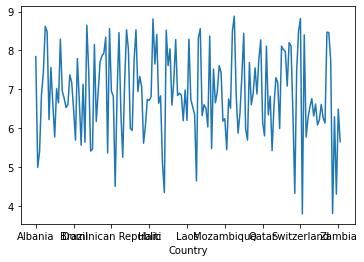

In [57]:
freedomscore.plot()

<AxesSubplot:ylabel='Frequency'>

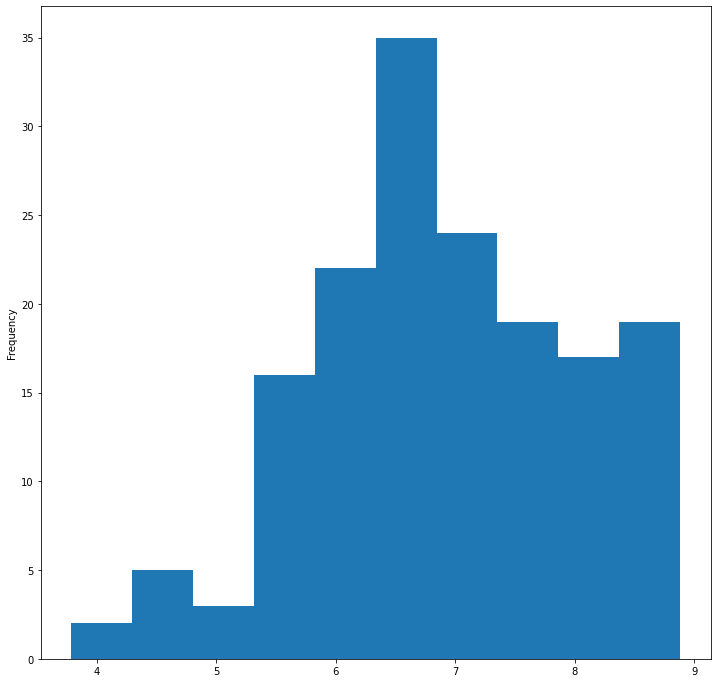

In [58]:
plt.figure(figsize=(12,12))
freedomscore.plot(kind="hist")

In [59]:
least=df[df["FreeSc"]<5.5]
set(least["Country"])

{'Algeria',
 'Angola',
 'Central African Republic',
 'Chad',
 'Democratic Republic of the Congo',
 'Egypt',
 'Ethiopia',
 'Iran',
 'Iraq',
 'Libya',
 'Mauritania',
 'Myanmar',
 'Saudi Arabia',
 'Sudan',
 'Syria',
 'Venezuela',
 'Yemen'}

In [60]:
most=df[df["FreeSc"]>=8.3]
set(most["Country"])

{'Australia',
 'Austria',
 'Canada',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'Germany',
 'Hong Kong',
 'Iceland',
 'Ireland',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'United Kingdom',
 'United States'}

<Figure size 864x864 with 0 Axes>

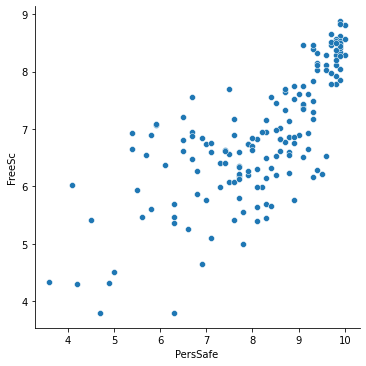

In [61]:
plt.figure(figsize=(12,12))
sns.relplot(data=df,x="PersSafe",y="FreeSc")

<Figure size 864x864 with 0 Axes>

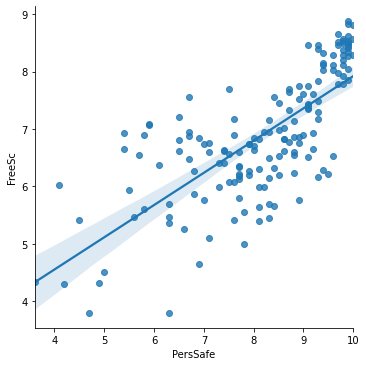

In [62]:
plt.figure(figsize=(12,12))
sns.lmplot(data=df,x="PersSafe",y="FreeSc")

In [63]:
from sklearn.cluster import KMeans
subset=df[["Country","RelFree","FreeSc","FemSafe","EcoFreeSc"]]
subset.head()
subset.shape

(162, 5)

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
subset2=imp.fit_transform(subset.iloc[:,1:])
sc=StandardScaler()
scaled=sc.fit_transform(subset2)
kmn=KMeans(n_clusters=3, random_state=111)
clusters=kmn.fit_predict(scaled)

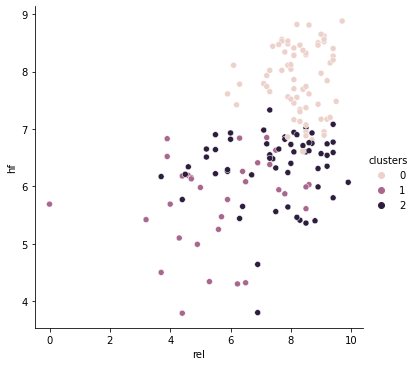

In [65]:
sondata=pd.DataFrame({
    "countries":df["Country"],
    "rel":df["RelFree"],
    "hf":df["FreeSc"],
    "clusters":clusters,
    "woman":df["FemSafe"]
})


sns.relplot(x="rel", y="hf", hue="clusters", data=sondata);

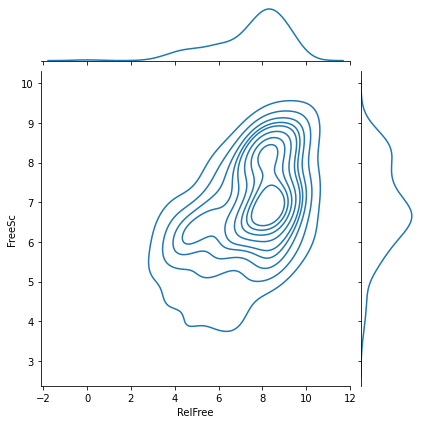

In [66]:
sns.jointplot(x=df.RelFree, y=df.FreeSc,kind = "kde") # there are options that  “scatter” | “reg” | “resid” | “kde” | “hex”

##### Interestingly, the biggest chunk of regions contributing to the report also happens to belong to Western Europe.

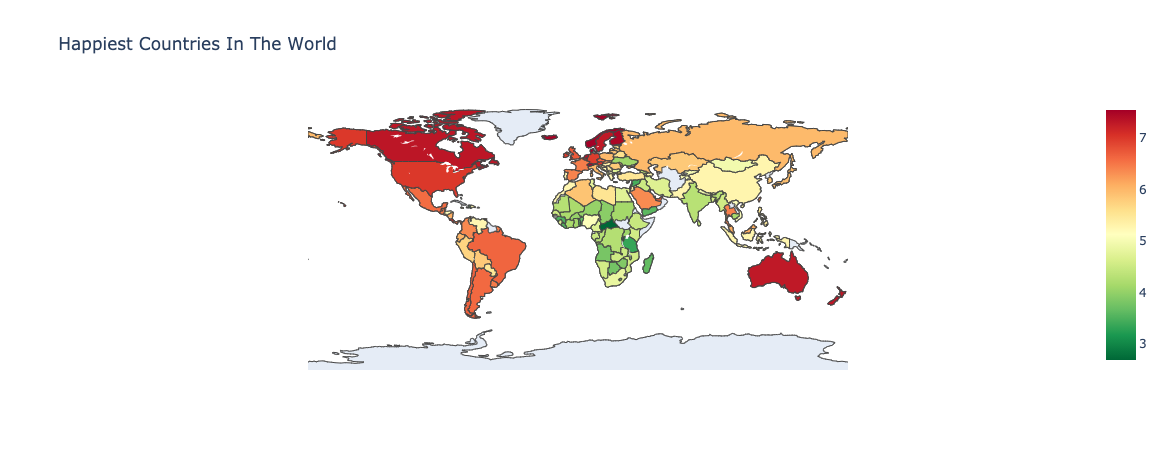

In [67]:
# happiest countries in the world 

map_plot = dict(type = 'choropleth', 
locations = df['Country'],
locationmode = 'country names',
z = df['HappySc'], 
text = df['Region'],
colorscale = 'rdylgn', reversescale = True)
layout = dict(title = 'Happiest Countries In The World ', 
geo = dict(showframe = False, 
projection = {'type': 'equirectangular'}))
choromap = go.Figure(data = [map_plot], layout=layout)
iplot(choromap)

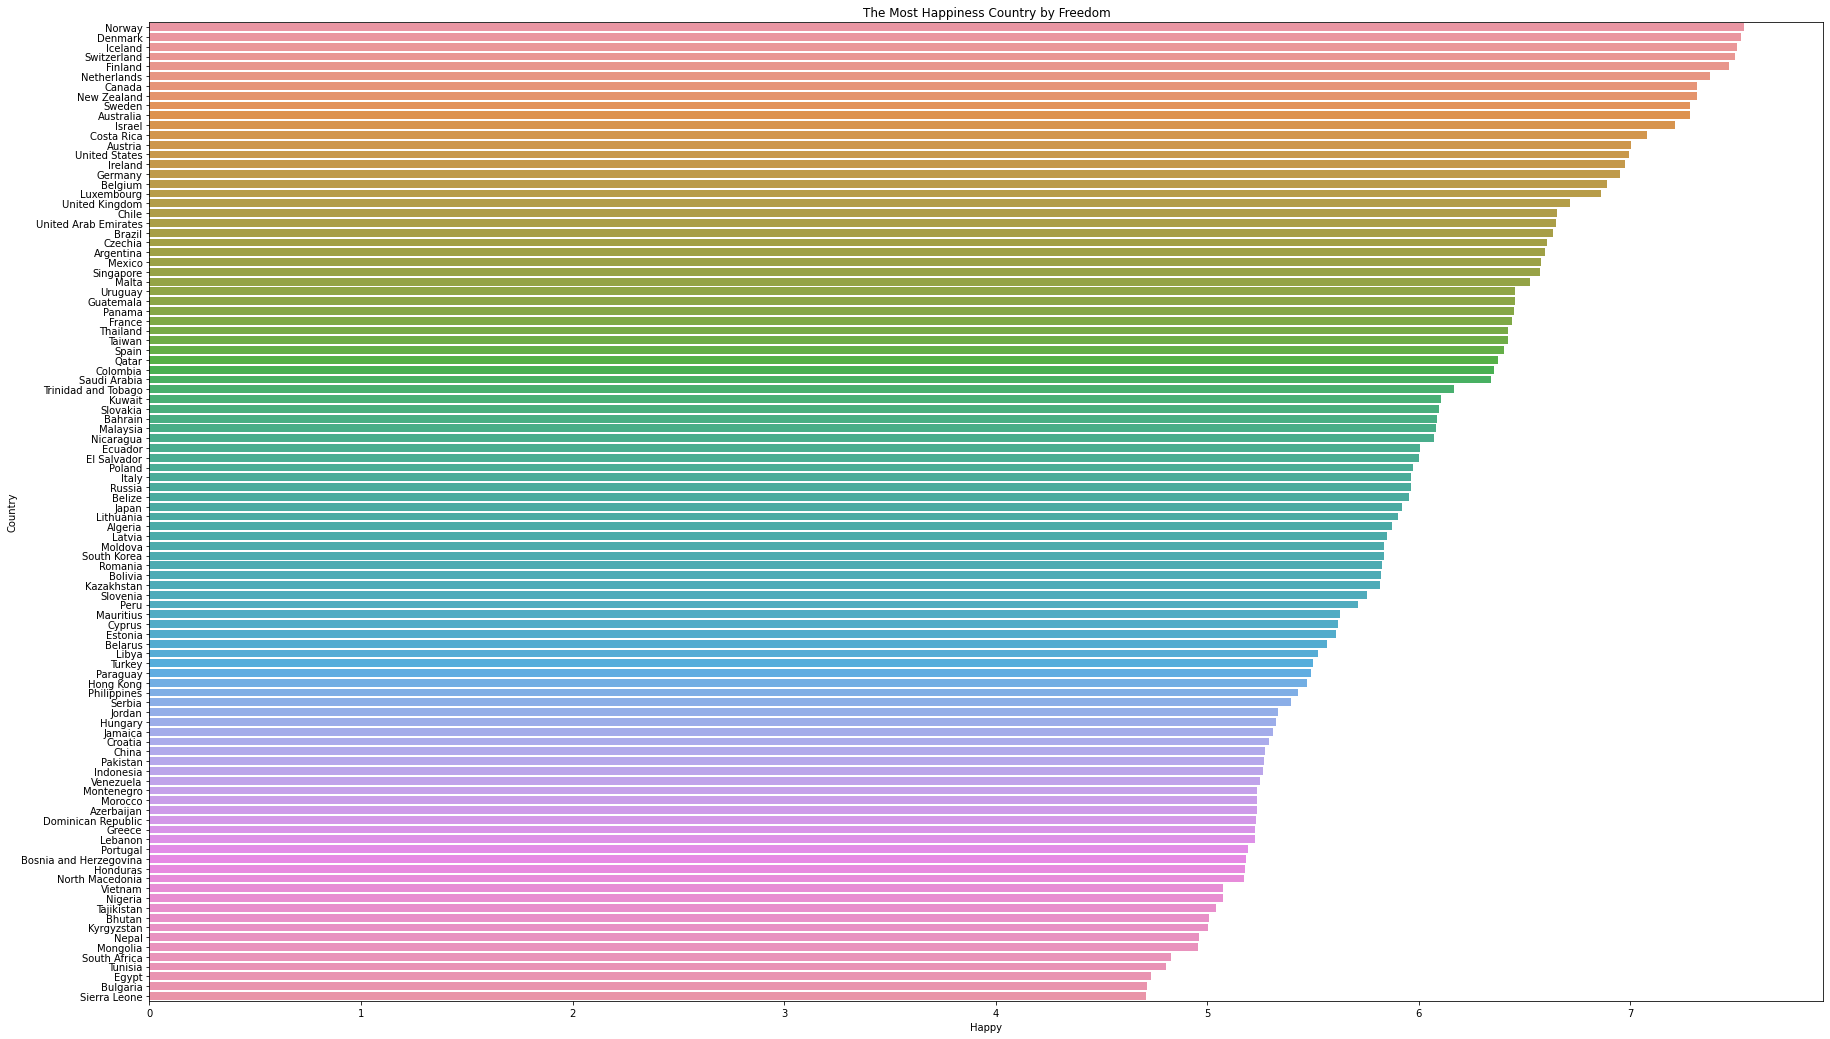

In [68]:
Freedom_c = df.sort_values(by='HappySc', ascending=False)[:100]
figure = plt.figure(figsize=(30,18))
sns.barplot(y=Freedom_c.Country, x=Freedom_c.HappySc)
plt.xticks()
plt.xlabel('Happy')
plt.ylabel('Country')
plt.title('The Most Happiness Country by Freedom')
plt.show()

In [69]:
cd = df.sort_values('HappyRk', ascending=False) #.head(10) geht auch mit by = (df.sort_values(by="spaltenname"))

In [70]:
pd.set_option("display.max_rows", None)

In [71]:
cd[['Country', 'HappyRk']]

Country  HappyRk
29           Central African Republic    155.0
24                            Burundi    154.0
144                          Tanzania    153.0
141                             Syria    152.0
124                            Rwanda    151.0
147                              Togo    150.0
57                             Guinea    149.0
84                            Liberia    148.0
159                             Yemen    146.0
60                              Haiti    145.0
88                         Madagascar    144.0
15                              Benin    143.0
19                           Botswana    142.0
2                              Angola    140.0
83                            Lesotho    139.0
161                          Zimbabwe    138.0
30                               Chad    137.0
89                             Malawi    136.0
107                             Niger    135.0
23                       Burkina Faso    134.0
151                            Uganda    133.0
152                           Ukraine    132.0
54                              Ghana    131.0
137                             Sudan    130.0
25                           Cambodia    129.0
72                        Ivory Coast    128.0
91                               Mali    127.0
38   Democratic Republic of the Congo    126.0
52                            Georgia    125.0
121             Republic of the Congo    124.0
93                         Mauritania    123.0
65                              India    122.0
4                             Armenia    121.0
136                         Sri Lanka    120.0
46                           Ethiopia    119.0
50                              Gabon    118.0
68                               Iraq    117.0
160                            Zambia    116.0
126                           Senegal    115.0
101                           Myanmar    114.0
100                        Mozambique    113.0
77                              Kenya    112.0
102                           Namibia    111.0
10                         Bangladesh    110.0
0                             Albania    109.0
67                               Iran    108.0
26                           Cameroon    107.0
129                      Sierra Leone    106.0
22                           Bulgaria    105.0
42                              Egypt    104.0
149                           Tunisia    102.0
133                      South Africa    101.0
97                           Mongolia    100.0
103                             Nepal     99.0
79                         Kyrgyzstan     98.0
16                             Bhutan     97.0
143                        Tajikistan     96.0
108                           Nigeria     95.0
158                           Vietnam     94.0
109                   North Macedonia     92.0
61                           Honduras     91.0
18             Bosnia and Herzegovina     90.0
119                          Portugal     89.0
82                            Lebanon     88.0
55                             Greece     87.0
40                 Dominican Republic     86.0
7                          Azerbaijan     85.0
99                            Morocco     84.0
98                         Montenegro     83.0
157                         Venezuela     82.0
66                          Indonesia     81.0
112                          Pakistan     80.0
32                              China     79.0
35                            Croatia     77.0
73                            Jamaica     76.0
63                            Hungary     75.0
75                             Jordan     74.0
127                            Serbia     73.0
117                       Philippines     72.0
62                          Hong Kong     71.0
115                          Paraguay     70.0
150                            Turkey     69.0
85                              Libya     68.0
12                            Belarus     67.0
44                            Eston